# 代码调试笔记本

In [1]:
#操作目录和文件
import sys, os; 
#导入shp
import shapefile as shpf; 
#处理几何信息
import shapely; 
import shapely.geometry as shplgeo, shapely.affinity as shplaffin; 
import shapely.ops as shplops; 
#数值计算和函数处理
import numpy as np; 
from functools import partial; 
#投影变换
import pyproj; 
#用户界面
import tkinter as tk; 
import tkintermapview as tkmvw; 

## `shp`文件的导入
导入东湖绿道部分路段路网

In [2]:
import File_IO.ELGW_Load

In [3]:
ELGW_Path_Minor_dir = "E:\\CUGW_Master\\Geoinformatics\\" + \
    "East_Lake_Greenway_Navigation\\ELGW-GIS\\" + \
    "Data_Built-in\\ELGW_Path\\ELGW_Main_2D_EPSG_32649.shp"; 

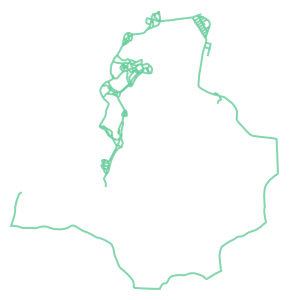

In [4]:
ELGW_Path_Minor = File_IO.ELGW_Load.elgw_scenic_path_load(); 
shplgeo.GeometryCollection(ELGW_Path_Minor.geometry)

In [5]:
sum(entity.length for entity in ELGW_Path_Minor.geometry)

35806.340834734954

## `shp`文件的投影变换

In [6]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [7]:
import Transform.Reproject

In [8]:
ELGW_Path_Minor_WGS_shplgeo = Transform.Reproject.backward_convert( \
    shplgeo.GeometryCollection(ELGW_Path_Minor.geometry)); 
ELGW_Path_Minor_WGS = ELGW_Path_Minor.copy(); 
ELGW_Path_Minor_WGS.geometry = ELGW_Path_Minor_WGS_shplgeo; 

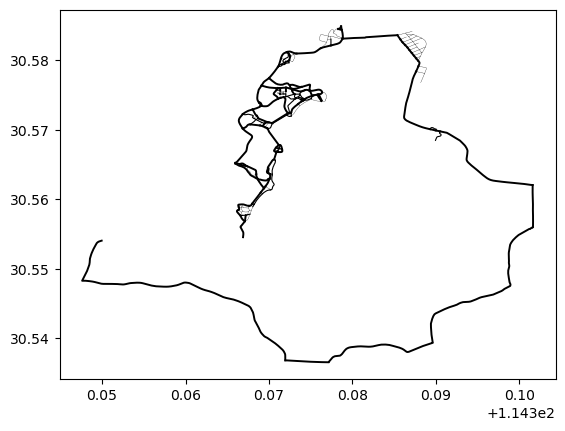

In [9]:
from matplotlib import pyplot as plt; 
for pline, rec in zip(ELGW_Path_Minor_WGS.geometry, 
    ELGW_Path_Minor.attribute["Path_Grade"]): 
    x, y = pline[0].coords.xy; 
    plt.plot(x, y, color="black", linewidth= 2 - 0.6 * float(rec)); 
plt.show(); 

## 图形绘制与交互

In [10]:
import Interface.Tk_Redrawable as tkrdw; 

In [11]:
#初始化窗口
wnd_main = tk.Tk(); 
wnd_main.title("ELGW Path Distribution"); 
wnd_main.geometry("800x600"); 
wnd_main.resizable(width=False, height=False); 

In [12]:
#添加顶端菜单栏
mnu_main_top = tk.Menu(wnd_main); 
wnd_main.config(menu = mnu_main_top); 
mnu_main_File = tk.Menu(wnd_main); 
mnu_main_top.add_cascade(label = "File", menu = mnu_main_File)

In [13]:
#添加地图界面
map_main_geo = tkrdw.TkMapViewRedrawable(wnd_main, width=800, height=600); 
map_main_geo.set_position(30.56, 114.37); 
map_main_geo.set_zoom(15); 
map_main_geo.min_zoom = 14; map_main_geo.max_zoom = 19; 

In [14]:
ELGW_Path_Minor_L1 = []; 
ELGW_Path_Minor_L2 = []; 
ELGW_Path_Minor_L3 = []; 
for geom, attrib in zip(
    ELGW_Path_Minor_WGS.geometry, 
    np.int16(ELGW_Path_Minor_WGS.attribute["Path_Grade"])
): 
    if attrib == 3: 
        ELGW_Path_Minor_L3.append(geom); 
    elif attrib == 2: 
        ELGW_Path_Minor_L2.append(geom); 
    elif attrib == 1: 
        ELGW_Path_Minor_L1.append(geom); 
ELGW_Path_Minor_L1 = tkrdw.RedrawableGeometry(
    shplops.unary_union(ELGW_Path_Minor_L1), border_width=4, min_zoom=14
); 
ELGW_Path_Minor_L2 = tkrdw.RedrawableGeometry(
    shplops.unary_union(ELGW_Path_Minor_L2), border_width=3, min_zoom=15
); 
ELGW_Path_Minor_L3 = tkrdw.RedrawableGeometry(
    shplops.unary_union(ELGW_Path_Minor_L3), border_width=2, min_zoom=17
); 

In [15]:
map_main_geo.layers = [ELGW_Path_Minor_L1, ELGW_Path_Minor_L2, ELGW_Path_Minor_L3]
#为用户交互事件指定要执行的命令
map_main_redraw = map_main_geo.redraw_annotation
#用户拖拽地图, 或者点击界面上的缩放按钮缩放地图
wnd_main.bind("<B1-ButtonRelease>", map_main_redraw); 
#用户从其他界面切换至当前界面
wnd_main.bind("<FocusIn>", map_main_redraw); 
#用户通过鼠标滚轮缩放地图
wnd_main.bind("<MouseWheel>", map_main_redraw); 

In [16]:
map_main_geo.redraw_annotation(1)

In [17]:
map_main_geo.pack();
wnd_main.mainloop(); 